In [44]:
#Importações

%matplotlib notebook

import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Regression Tree
from sklearn.tree import DecisionTreeRegressor
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

#Importações para as predições
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Melhora a visualização
from IPython.display import display

In [45]:
#Função para Regressão
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [3]:
data = pd.read_csv("Admission_Predict.csv")

In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
#Criação do DataFrame
df = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']]
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


<IPython.core.display.Javascript object>


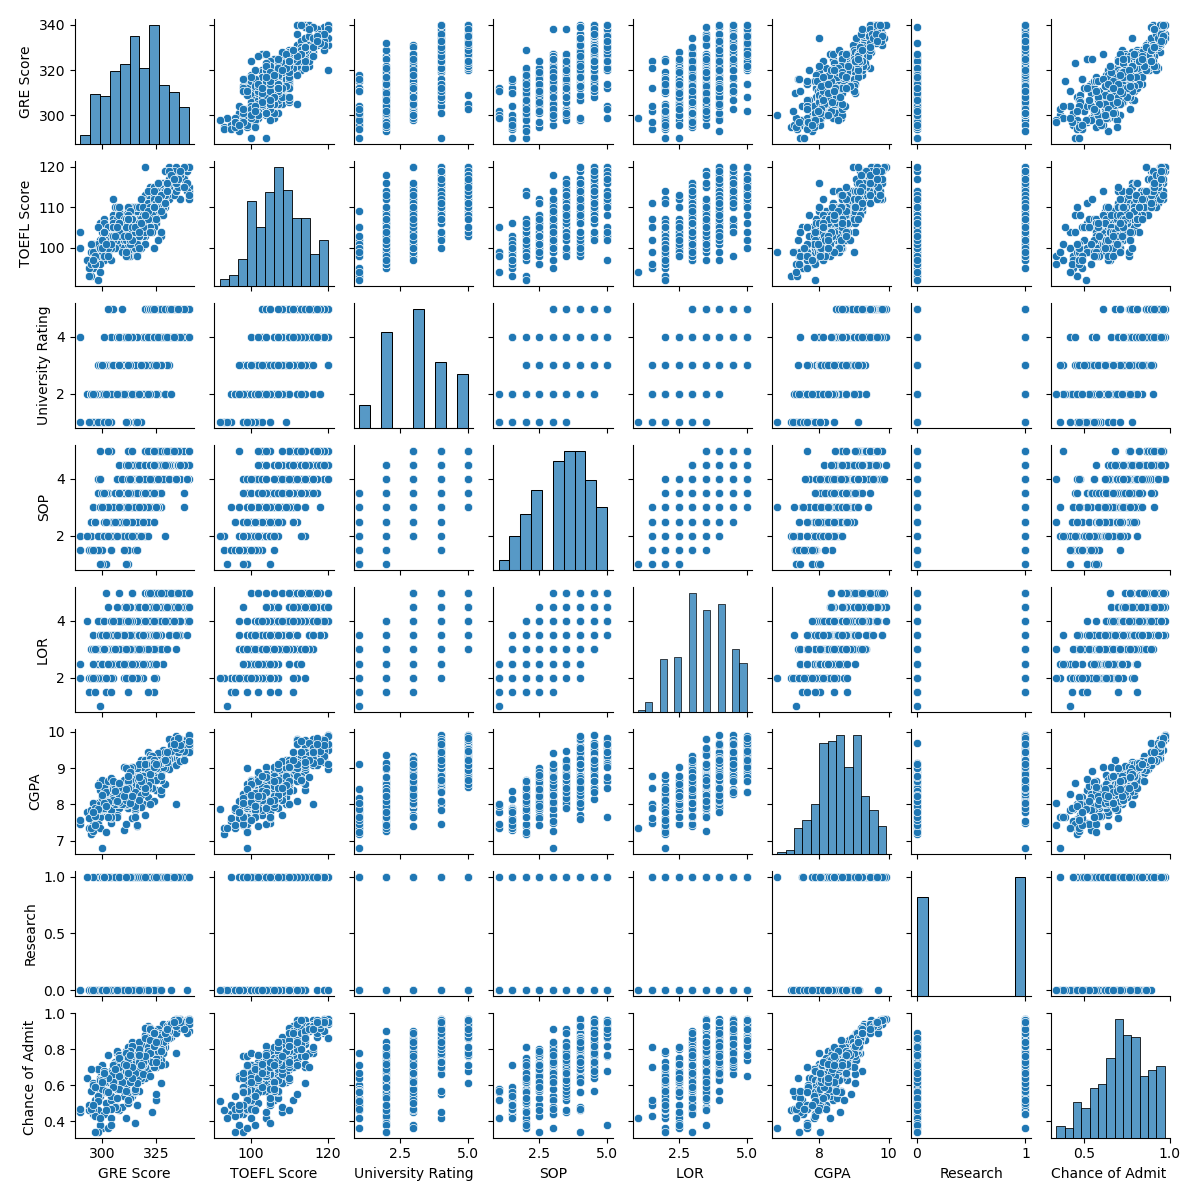

In [91]:
#Análise exploratória por meio de gráficos
sns.pairplot(df, height = 1.5)

In [88]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [9]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [70]:
#Montagem da Regression Tree e Random Forest
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
Y = df['Chance of Admit ']

In [71]:
#Separação para 70% de treinamento and 30% de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) 

In [81]:
#Montagem da Decision Tree
dtr = DecisionTreeRegressor()

dtr = dtr.fit(X_train, Y_train)

Y_pred = dtr.predict(X_test)

In [82]:
#Avaliação da porcentagem de acerto da Decision Tree
metrics.r2_score(Y_test, Y_pred)

0.6464199087658931

<IPython.core.display.Javascript object>


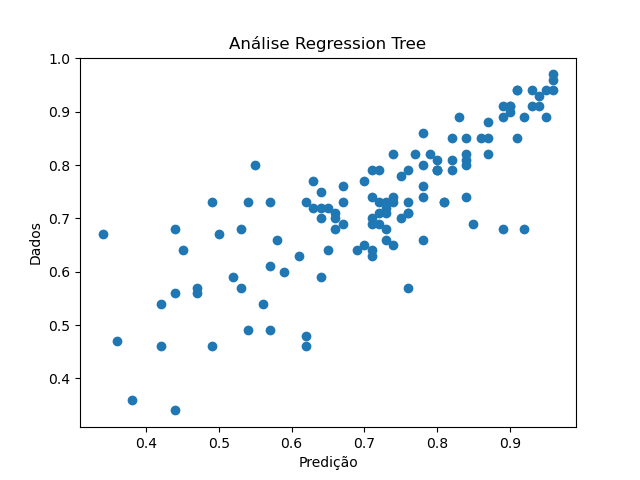

In [89]:
#Gráfico da Decision Tree
plt.figure()

plt.scatter(Y_test, Y_pred)
plt.xlabel('Predição')
plt.ylabel('Dados')
plt.title('Análise Regression Tree')

plt.show()

In [84]:
#Montagem da Random Forest

rfr = RandomForestRegressor()

rfr = rfr.fit(X_train, Y_train)

y_pred = rfr.predict(X_test)

In [85]:
#Avaliação da porcentagem de acerto da Random Forest
metrics.r2_score(Y_test, y_pred)

0.7846038467308385

<IPython.core.display.Javascript object>


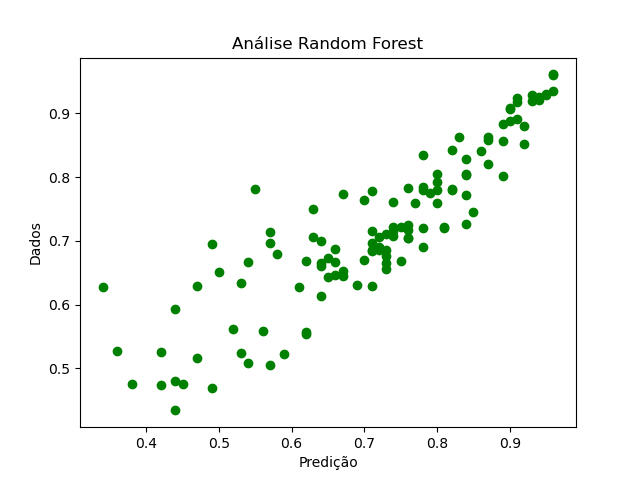

In [90]:
#Gráfico da Random Forest
plt.figure()

plt.scatter(Y_test, y_pred, color = 'g')
plt.xlabel('Predição')
plt.ylabel('Dados')
plt.title('Análise Random Forest')

plt.show()